In [1]:
# Scikit-learn で線形回帰
# https://qiita.com/0NE_shoT_/items/08376b08783cd554b02e

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [5]:
import pandas as pd

# 説明変数(boston.data)をDataFrameに保存
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)

# 目的変数(boston.target)もDataFrameに追加
boston_df['MEDV'] = boston.target

In [7]:
# CRIM	犯罪発生率
# ZN	25,000平方フィート以上の住宅区画の割合
# INDUS	非小売業種の土地面積の割合
# CHAS	チャールズ川沿いかを表すダミー変数
# NOX	窒素酸化物の濃度
# RM	平均部屋数
# AGE	1940年より前に建てられた建物の割合
# DIS	5つのボストンの雇用施設への重み付き距離
# RAD	高速道路へのアクセスのしやすさ
# TAX	10,000ドルあたりの不動産税率
# PTRATIO	生徒と教師の割合
# B	黒人の割合
# LSTAT	低所得者の割合
# MEDV	住宅価格の中央値（1,000単位）

boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


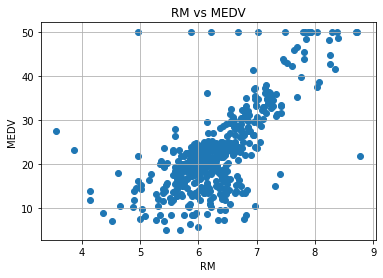

In [10]:
import matplotlib.pyplot as plt
plt.scatter(boston_df["RM"], boston_df["MEDV"])

plt.title("RM vs MEDV")
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.grid()

In [23]:
# RMとMEDVの相関係数を算出する
# 0.7程度と高い

boston_df[["RM", "MEDV"]].corr()

,RM,MEDV
RM,1.00000,0.69536
MEDV,0.69536,1.00000


In [12]:
# 線形回帰モデルを構築

In [26]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

x = boston_df[["RM"]].values
y = boston_df[["MEDV"]].values

lr.fit(x, y)

LinearRegression()

In [27]:
print('coefficient = ', lr.coef_[0])
print('intercept = ', lr.intercept_)

coefficient =  [9.10210898]
intercept =  [-34.67062078]


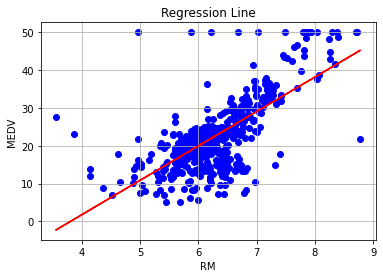

In [28]:
# 説明変数と目的変数のデータ点の散布図をプロット

plt.scatter(x, y, color='blue')
plt.plot(X, lr.predict(X), color='red')

plt.title('Regression Line')
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.grid()

In [30]:
# 線形回帰モデルの性能評価
# 学習データを用いて線形モデルを構築

In [31]:
from sklearn.model_selection import train_test_split

# データを学習用と検証用に分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 0)

# 線形モデルの重みを学習
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

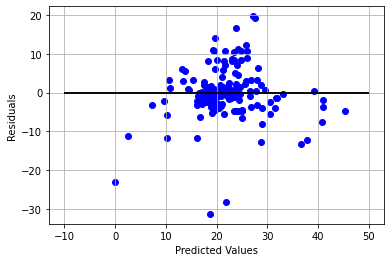

In [33]:
# 検証データを用いて目的変数を予測

Y_pred = lr.predict(X_test)

plt.scatter(Y_pred, Y_pred - Y_test, color = 'blue')
plt.hlines(y = 0, xmin = -10, xmax = 50, color = 'black')

plt.hlines(y = 0, xmin = -10, xmax = 50, color = 'black')
plt.xlabel('Predicted Values') 
plt.ylabel('Residuals')
plt.grid() 